## SimpleImputer
### This notebook outlines the usage of Simple Imputer (Univariate Imputation).
### Simple Imputer substitutes missing values statistics (mean, median, ...)
#### Dataset: [https://github.com/subashgandyer/datasets/blob/main/heart_disease.csv]

**Demographic**
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

**Predict variable (desired target)**
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data/heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### How many Categorical variables in the dataset?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
categorical_variables = ["male", "currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]
len(categorical_variables)

6

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### How many Missing values in the dataset?
Hint: df.Series.isna( ).sum( )

In [9]:
for i, column in enumerate(df.columns):
    missing_data = df[column].isna().sum()
    perc = missing_data / len(df) * 100
    print(f'Feature {i+1} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

Feature 1 >> Missing entries: 0  |  Percentage: 0.0
Feature 2 >> Missing entries: 0  |  Percentage: 0.0
Feature 3 >> Missing entries: 105  |  Percentage: 2.48
Feature 4 >> Missing entries: 0  |  Percentage: 0.0
Feature 5 >> Missing entries: 29  |  Percentage: 0.68
Feature 6 >> Missing entries: 53  |  Percentage: 1.25
Feature 7 >> Missing entries: 0  |  Percentage: 0.0
Feature 8 >> Missing entries: 0  |  Percentage: 0.0
Feature 9 >> Missing entries: 0  |  Percentage: 0.0
Feature 10 >> Missing entries: 50  |  Percentage: 1.18
Feature 11 >> Missing entries: 0  |  Percentage: 0.0
Feature 12 >> Missing entries: 0  |  Percentage: 0.0
Feature 13 >> Missing entries: 19  |  Percentage: 0.45
Feature 14 >> Missing entries: 1  |  Percentage: 0.02
Feature 15 >> Missing entries: 388  |  Percentage: 9.16
Feature 16 >> Missing entries: 0  |  Percentage: 0.0


### Bonus: Visual representation of missing values

<AxesSubplot:>

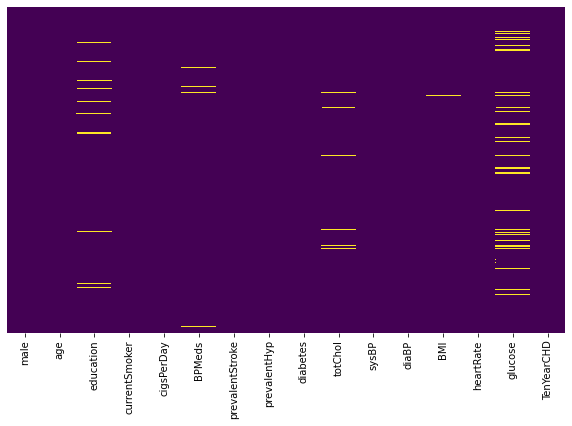

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Import SimpleImputer

In [10]:
from sklearn.impute import SimpleImputer

### Create SimpleImputer object with 'mean' strategy

In [11]:
mean_imputer = SimpleImputer(strategy='mean')

### Optional - converting df into numpy array (There is a way to directly impute from dataframe as well)

In [13]:
data = df.values

In [14]:
X = data[:, :-1]
y = data[:, -1]

### Fit the imputer model on dataset to calculate statistic for each column

In [32]:
mean_imputer.fit(df)

SimpleImputer()

### Trained imputer model is applied to dataset to create a copy of dataset with all filled missing values from the calculated statistic using transform( ) 

In [33]:
X_mean_imputed = mean_imputer.fit_transform(df)

### Sanity Check: Whether missing values are filled or not

In [30]:
print("Missing cells:", sum([df[column].isna().sum() for column in df.columns]))

Missing cells: 645


In [34]:
df_mean_imputed = pd.DataFrame(X_mean_imputed, columns = df.columns)
print("Missing cells:", sum([df_mean_imputed[column].isna().sum() for column in df_mean_imputed.columns]))

Missing cells: 0


### Let's try to visualize the missing values.

<AxesSubplot:>

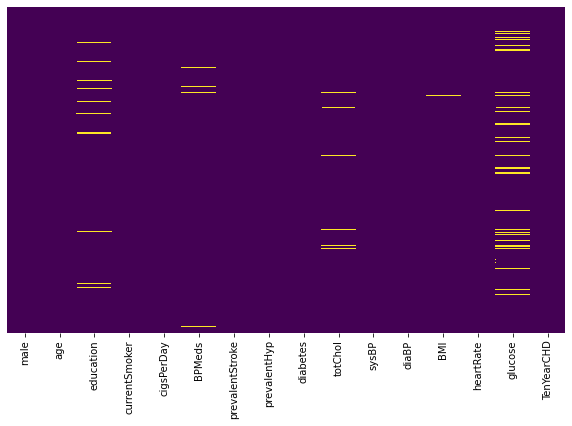

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

<Axes: >

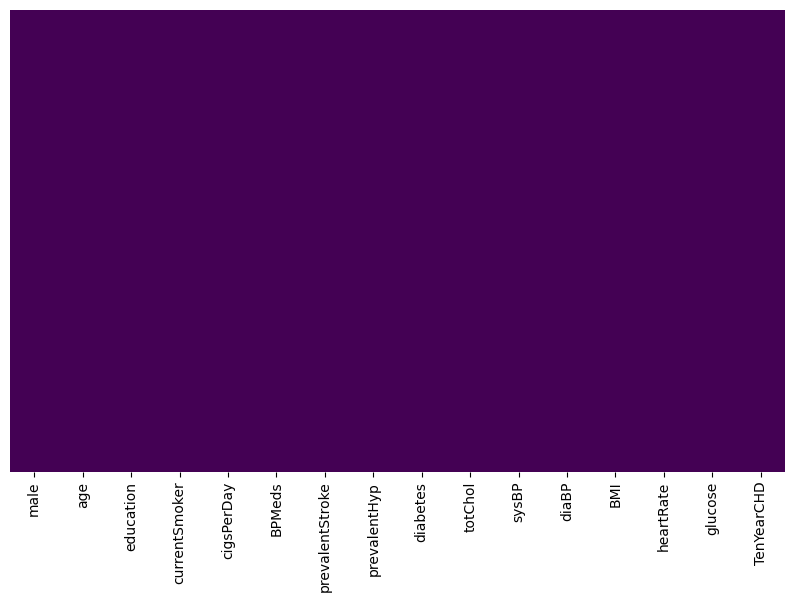

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(df_mean_imputed.isna(), cbar=False, cmap='viridis', yticklabels=False)

### What's the issue here?
#### Hint: Heatmap needs a DataFrame and not a Numpy Array

In [42]:
# Changed to dataframe while doing sanity check( missing values)

# Redoing again - 

df_transform = pd.DataFrame(X_mean_imputed, columns = df.columns)
df_transform

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.00000,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,2.0,0.0,0.0,0.00000,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,1.0,20.0,0.00000,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0
3,0.0,61.0,3.0,1.0,30.0,0.00000,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0
4,0.0,46.0,3.0,1.0,23.0,0.00000,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.00000,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.000000,1.0
4234,1.0,51.0,3.0,1.0,43.0,0.00000,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.000000,0.0
4235,0.0,48.0,2.0,1.0,20.0,0.02963,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.00000,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.966753,0.0


<Axes: >

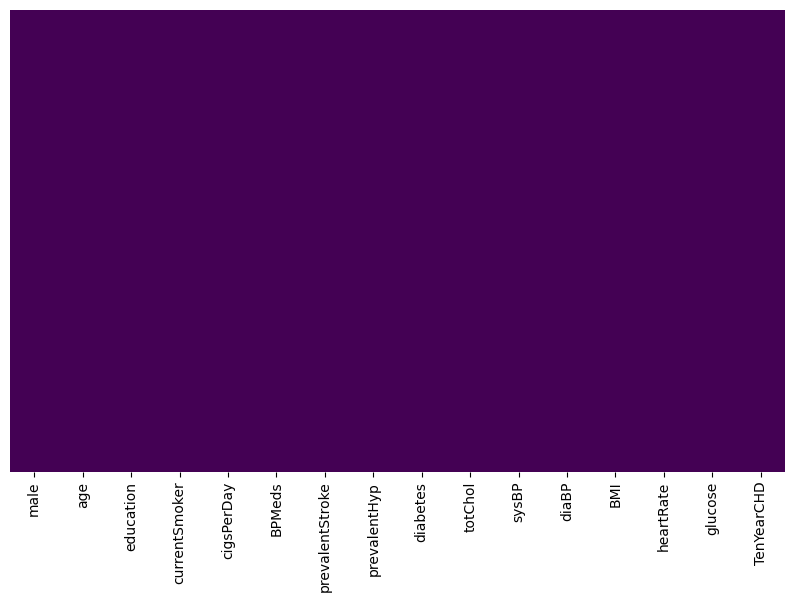

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(df_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)

# Check if these datasets contain missing data
### Load the datasets

In [18]:
X_train = pd.read_csv("X_train.csv")
Y_train = pd.read_csv("Y_train.csv")
Y_test = pd.read_csv("Y_test.csv")
X_test = pd.read_csv("X_test.csv")

In [19]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((384, 12), (384, 1), (96, 12), (96, 1))

<AxesSubplot:>

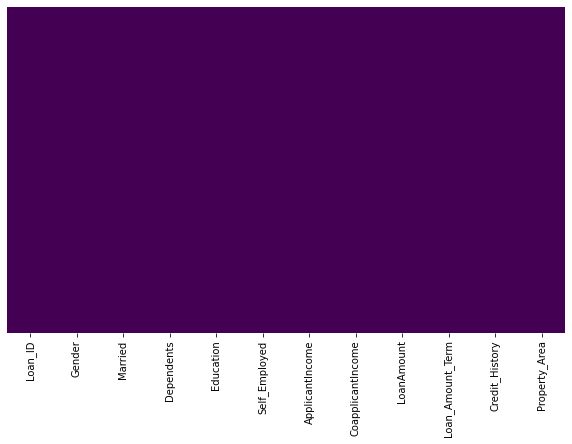

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Is there missing data in this dataset???

No missing data present in this dataset

# Build a Logistic Regression model Without imputation

In [44]:
df=pd.read_csv("data/heart_disease.csv")
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [67]:
model = LogisticRegression(max_iter=1000)

In [47]:
model.fit(X,y)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Drop all rows with missing entries - Build a Logistic Regression model and benchmark the accuracy

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [49]:
df=pd.read_csv("data/heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [50]:
df.shape

(4238, 16)

### Drop rows with missing values

In [52]:
df.dropna(inplace=True)
df.shape

(3656, 16)

### Split dataset into X and y

In [53]:
X = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]

In [54]:
y.shape

(3656,)

### Create a pipeline with model parameter

In [68]:
pipeline = Pipeline([('model', model)])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [69]:
cross_validation = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [70]:
accuracy_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cross_validation, n_jobs=-1)

/Users/vignesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vignesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

/Users/vignesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vignesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [73]:
accuracy_scores

array([0.85245902, 0.85245902, 0.85519126, 0.8579235 , 0.85245902,
       0.8442623 , 0.84931507, 0.8630137 , 0.84931507, 0.85479452,
       0.86065574, 0.85245902, 0.86065574, 0.84153005, 0.8442623 ,
       0.8442623 , 0.85753425, 0.84931507, 0.85753425, 0.84931507,
       0.85519126, 0.86338798, 0.85519126, 0.8442623 , 0.87431694,
       0.8442623 , 0.85479452, 0.84931507, 0.85753425, 0.84657534])

In [74]:
accuracy_scores.shape

(30,)

### Print the Mean Accuracy and Standard Deviation from scores

In [76]:
print(f"Mean Accuracy: {round(np.mean(accuracy_scores), 3)}  | Std: {round(np.std(accuracy_scores), 3)}")

Mean Accuracy: 0.853  | Std: 0.007


# Build a Logistic Regression model with SimpleImputer Mean Strategy

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [78]:
df=pd.read_csv("data/heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Split dataset into X and y

In [38]:
df.shape

(4238, 16)

In [79]:
X = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]
X.shape

(4238, 15)

In [80]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

### Create a SimpleImputer with mean strategy

In [83]:
mean_imputer = SimpleImputer(strategy='mean')

### Create a Logistic Regression model

In [92]:
model1 = LogisticRegression(max_iter=1000)

### Create a pipeline with impute and model parameters

In [93]:
pipeline1 = Pipeline([("Imputer", mean_imputer), ("Regression", model1)])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [94]:
cv1 = RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [95]:
accuracy_score1 = cross_val_score(pipeline1, X, y,scoring='accuracy', cv=cv1, n_jobs=-1)

/Users/vignesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vignesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

/Users/vignesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vignesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [96]:
accuracy_score1

array([0.85377358, 0.85613208, 0.84669811, 0.85613208, 0.85849057,
       0.85377358, 0.84669811, 0.85613208, 0.86052009, 0.85579196,
       0.85141509, 0.84669811, 0.84433962, 0.86084906, 0.8490566 ,
       0.86320755, 0.85377358, 0.85613208, 0.85815603, 0.85815603,
       0.85377358, 0.85613208, 0.8490566 , 0.84433962, 0.8490566 ,
       0.85141509, 0.85141509, 0.86556604, 0.86052009, 0.85579196])

### Print the Mean Accuracy and Standard Deviation

In [97]:
print(f"Mean Accuracy: {round(np.mean(accuracy_score1), 3)}  | Std: {round(np.std(accuracy_score1), 3)}")

Mean Accuracy: 0.854  | Std: 0.005


### Which accuracy is better? 
- Dropping missing values
- SimpleImputer with Mean Strategy

SimpleImputer with Mean Strategy gives better accuracy than dropping missing values

# SimpleImputer Mean - Benchmark after Mean imputation with RandomForest

### Import libraries

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

### Create a SimpleImputer with mean strategy

In [102]:
mean_imputer = SimpleImputer(strategy='mean')

### Create a RandomForest model

In [100]:
rf_model = RandomForestClassifier(n_estimators=500, n_jobs=-1)

### Create a pipeline

In [103]:
pipeline2 = Pipeline([("imputer", mean_imputer), ("rf_model", rf_model)])

### Create RepeatedStratifiedKFold

In [104]:
cv2 = RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1)

### Create Cross_val_score

In [105]:
accuracy_score2 = cross_val_score(pipeline2, X, y, scoring="accuracy", cv=cv2, n_jobs=-1)

### Print Mean Accuracy and Standard Deviation

In [106]:
print(f"Mean Accuracy: {round(np.mean(accuracy_score2), 3)}  | Std: {round(np.std(accuracy_score2), 3)}")

Mean Accuracy: 0.849  | Std: 0.006


# Assignment
# Run experiments with different Strategies and different algorithms

## STRATEGIES
- Mean
- Median
- Most_frequent
- Constant

## ALGORITHMS
- Logistic Regression
- KNN
- Random Forest
- SVM
- Any other algorithm of your choice

#### Hint: Collect the pipeline creation, KFold, and Cross_Val_Score inside a for loop and iterate over different strategies in a list and different algorithms in a list

In [131]:
def get_X_and_y(df):
    X = df.drop("TenYearCHD", axis=1)
    y = df["TenYearCHD"]
    return X, y

In [110]:
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from tqdm.contrib import itertools

In [149]:
impute_strategies= ["mean", "median", "most_frequent", "constant"]
algorithms= [LogisticRegression(), KNeighborsClassifier(n_neighbors=3, n_jobs=-1),
             RandomForestClassifier(n_estimators=1000, max_depth=48, n_jobs=-1), SVC(), LGBMClassifier(max_depth=7)]


In [150]:
results = []

for impute_strategy, model in itertools.product(impute_strategies, algorithms):
    
        imputer = SimpleImputer(strategy=impute_strategy)
        pipeline = Pipeline([("imputer", imputer), ("model", model)])
        cv2 = RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1)
        
        X, y = get_X_and_y(df)
        accuracy_scores = cross_val_score(pipeline, X, y, scoring="accuracy", cv=cv2, n_jobs=-1)
        
        model_name = type(model).__name__
        mean_accuracy = round(np.mean(accuracy_scores), 3)
        std_accuracy = round(np.std(accuracy_scores), 3)
        
        result = {
            "Model": model_name, 
            "Strategy": impute_strategy,
            "Mean Accuracy": mean_accuracy, 
            "Std Accuracy": std_accuracy
        }
        
        results.append(result)
        
        print(f"Model: {model_name}, Mean Accuracy: {mean_accuracy}  | Std: {std_accuracy}")


  0%|          | 0/20 [00:00<?, ?it/s]

/Users/vignesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vignesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Model: LogisticRegression, Mean Accuracy: 0.851  | Std: 0.003
Model: KNeighborsClassifier, Mean Accuracy: 0.819  | Std: 0.013
Model: RandomForestClassifier, Mean Accuracy: 0.85  | Std: 0.006
Model: SVC, Mean Accuracy: 0.848  | Std: 0.002
Model: LGBMClassifier, Mean Accuracy: 0.845  | Std: 0.009


/Users/vignesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vignesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Model: LogisticRegression, Mean Accuracy: 0.85  | Std: 0.004
Model: KNeighborsClassifier, Mean Accuracy: 0.82  | Std: 0.013
Model: RandomForestClassifier, Mean Accuracy: 0.849  | Std: 0.005
Model: SVC, Mean Accuracy: 0.848  | Std: 0.002
Model: LGBMClassifier, Mean Accuracy: 0.844  | Std: 0.008


/Users/vignesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vignesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Model: LogisticRegression, Mean Accuracy: 0.849  | Std: 0.004
Model: KNeighborsClassifier, Mean Accuracy: 0.82  | Std: 0.012
Model: RandomForestClassifier, Mean Accuracy: 0.849  | Std: 0.005
Model: SVC, Mean Accuracy: 0.848  | Std: 0.002
Model: LGBMClassifier, Mean Accuracy: 0.845  | Std: 0.007


/Users/vignesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vignesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Model: LogisticRegression, Mean Accuracy: 0.85  | Std: 0.005
Model: KNeighborsClassifier, Mean Accuracy: 0.823  | Std: 0.011
Model: RandomForestClassifier, Mean Accuracy: 0.849  | Std: 0.005
Model: SVC, Mean Accuracy: 0.848  | Std: 0.002
Model: LGBMClassifier, Mean Accuracy: 0.846  | Std: 0.008


In [156]:
results_df = pd.DataFrame(results)
results_df.sort_values("Mean Accuracy", ascending=False, inplace=True)
results_df

,Model,Strategy,Mean Accuracy,Std Accuracy
0,LogisticRegression,mean,0.851,0.003
2,RandomForestClassifier,mean,0.850,0.006
15,LogisticRegression,constant,0.850,0.005
5,LogisticRegression,median,0.850,0.004
7,RandomForestClassifier,median,0.849,0.005
17,RandomForestClassifier,constant,0.849,0.005
12,RandomForestClassifier,most_frequent,0.849,0.005
10,LogisticRegression,most_frequent,0.849,0.004
8,SVC,median,0.848,0.002
13,SVC,most_frequent,0.848,0.002


# Q1: Which is the best strategy for this dataset using Random Forest algorithm?
- MEAN
- MEDIAN
- MOST_FREQUENT
- CONSTANT

In [157]:
results_df[results_df["Model"] == "RandomForestClassifier"].sort_values("Mean Accuracy", ascending=False)

,Model,Strategy,Mean Accuracy,Std Accuracy
2,RandomForestClassifier,mean,0.850,0.006
7,RandomForestClassifier,median,0.849,0.005
17,RandomForestClassifier,constant,0.849,0.005
12,RandomForestClassifier,most_frequent,0.849,0.005


Mean and median does best as far as RandomForestClassifier concerned

# Q2:  Which is the best algorithm for this dataset using Mean Strategy?
- Logistic Regression
- Random Forest
- KNN
- any other algorithm of your choice (BONUS)

In [158]:
results_df[results_df["Strategy"] == "mean"].sort_values("Mean Accuracy", ascending=False)

,Model,Strategy,Mean Accuracy,Std Accuracy
0,LogisticRegression,mean,0.851,0.003
2,RandomForestClassifier,mean,0.850,0.006
3,SVC,mean,0.848,0.002
4,LGBMClassifier,mean,0.845,0.009
1,KNeighborsClassifier,mean,0.819,0.013


LogisticRegression and RandomForestClassifier does the best. LGBMClassifier and KNeighborsClassifier does the worst as far as Mean strategy concerned

# Q3: Which is the best combination of algorithm and best Imputation Strategy overall?
- Mean , Median, Most_frequent, Constant
- Logistic Regression, Random Forest, KNN

In [159]:
results_df.head()

,Model,Strategy,Mean Accuracy,Std Accuracy
0,LogisticRegression,mean,0.851,0.003
2,RandomForestClassifier,mean,0.850,0.006
15,LogisticRegression,constant,0.850,0.005
5,LogisticRegression,median,0.850,0.004
7,RandomForestClassifier,median,0.849,0.005


LogisticRegression with mean is the best strategy but we have convergence error. Most probably due to data is not scaled / normalized. RandomForest with mean does the best as far as this data concerned. 